In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/atharva/Desktop/Deep Learning/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(['customerID'], axis=1,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/lk/dlydmh491vbd85qz5qlxxm400000gn/T/ipykernel_2923/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtype

dtype('float64')

In [12]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

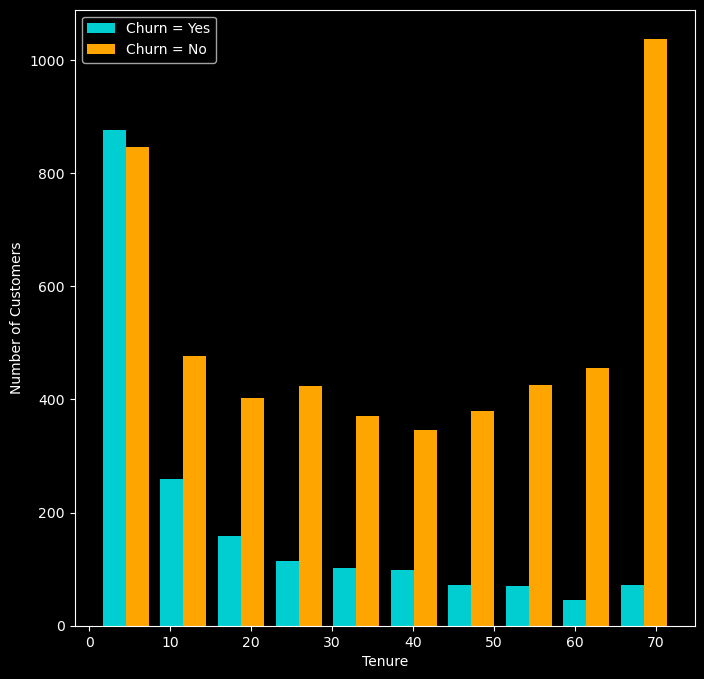

In [13]:
plt.figure(figsize=(8,8))

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['darkturquoise', 'orange'],label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()

In [14]:
def unique_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/var/folders/lk/dlydmh491vbd85qz5qlxxm400000gn/T/ipykernel_2923/4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/var/folders/lk/dlydmh491vbd85qz5qlxxm400000gn/T/ipykernel_2923/4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [16]:
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

/var/folders/lk/dlydmh491vbd85qz5qlxxm400000gn/T/ipykernel_2923/3902998835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)


In [18]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [19]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

/var/folders/lk/dlydmh491vbd85qz5qlxxm400000gn/T/ipykernel_2923/1975432841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)


In [20]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype='int64')
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4446,0,1,0,0,0.028169,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3118,0,0,0,0,0.605634,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1123,0,0,1,1,0.338028,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0


In [26]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [27]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20


2024-06-18 12:17:15.772814: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-18 12:17:15.772837: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-18 12:17:15.772843: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-18 12:17:15.773131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-18 12:17:15.773150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-18 12:17:16.088533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 1s 4ms/step - loss: 0.5473 - accuracy: 0.7244
Epoch 2/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4288 - accuracy: 0.7973
Epoch 3/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.7964
Epoch 4/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4186 - accuracy: 0.8018
Epoch 5/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8000
Epoch 6/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8064
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8023
Epoch 8/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8032
Epoch 9/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4168 - accuracy: 0.8023
Epoch 10/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8043
Epoch 11/2

In [32]:
model.evaluate(X_test, y_test)

40/44 [==========================>...] - ETA: 0s - loss: 0.4381 - accuracy: 0.7977

2024-06-18 12:17:29.643423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.7960


[0.4367727041244507, 0.7960199117660522]

In [33]:
y_pred = model.predict(X_test)
y_pred[0:5]

44/44 [==============================] - 0s 1ms/step


2024-06-18 12:17:29.920451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.01160752],
       [0.14309095],
       [0.6614116 ],
       [0.130219  ],
       [0.2990104 ]], dtype=float32)

In [34]:
y_pred_final = []
for pred in y_pred:
    if pred > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [35]:
y_pred_final[0:5]

[0, 0, 1, 0, 0]

In [36]:
y_test[0:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(50.722222222222214, 0.5, 'Actual')

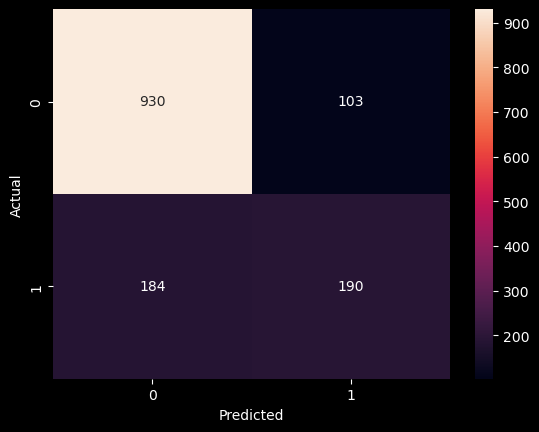

In [38]:
import seaborn as sns

sns.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=y_pred_final),annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')

Undersampling

In [39]:
count_class_0, count_class_1 = df2.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [40]:
df_class_0.shape

(5163, 27)

In [41]:
df_class_1.shape

(1869, 27)

In [42]:
df_class_0_under = df_class_0.sample(count_class_1)

In [43]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4286,0,0,1,0,0.112676,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1775,0,1,0,0,0.901408,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5633,0,0,0,1,0.070423,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4320,0,0,1,0,0.985915,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2819,1,0,0,0,0.042254,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [44]:
df_test_under.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [45]:
X = df_test_under.drop('Churn', axis=1)
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [47]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=10)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [48]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
14/94 [===>..........................] - ETA: 0s - loss: 0.7798 - accuracy: 0.5424 

2024-06-18 12:17:30.467258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 5ms/step - loss: 0.6624 - accuracy: 0.6161
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7421
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.7605
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7686
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7679
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.7682
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7702
Epoch 8/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.7682
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7709
Epoch 10/10
24/24 [==============================] - 0s 5ms/step - loss: 0.5236 - accuracy: 0.7353


2024-06-18 12:17:34.726588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.5236147046089172, 0.7352941036224365]
24/24 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       374
           1       0.74      0.72      0.73       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



2024-06-18 12:17:34.940175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Oversampling

In [49]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [50]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [51]:
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [52]:
X = df_test_over.drop('Churn', axis=1)
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [53]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [54]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
 14/259 [>.............................] - ETA: 1s - loss: 0.6725 - accuracy: 0.6250  

2024-06-18 12:17:35.223401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 1s 4ms/step - loss: 0.5486 - accuracy: 0.7291
Epoch 2/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5056 - accuracy: 0.7506
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5004 - accuracy: 0.7531
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4990 - accuracy: 0.7552
Epoch 5/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.7594
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.7586
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.7588
Epoch 8/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4961 - accuracy: 0.7581
Epoch 9/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4972 - accuracy: 0.7576
Epoch 10/10
36/65 [===============>..............] - ETA: 0s - loss: 0.4839 - accuracy: 0.7587

2024-06-18 12:17:46.065174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7580
[0.482662558555603, 0.7579864263534546]
65/65 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1033
           1       0.74      0.79      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



2024-06-18 12:17:46.380153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


SMOTE

In [55]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts(), X_sm.shape

(Churn
 0    5163
 1    5163
 Name: count, dtype: int64,
 (10326, 26))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [68]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
  1/259 [..............................] - ETA: 1:13 - loss: 0.9032 - accuracy: 0.5312

2024-06-18 12:21:37.844282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 1s 4ms/step - loss: 0.5707 - accuracy: 0.7027
Epoch 2/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.7723
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7746
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4688 - accuracy: 0.7769
Epoch 5/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7776
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7777
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4656 - accuracy: 0.7787
Epoch 8/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4657 - accuracy: 0.7793
Epoch 9/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4649 - accuracy: 0.7787
Epoch 10/10
36/65 [===============>..............] - ETA: 0s - loss: 0.4744 - accuracy: 0.7734

2024-06-18 12:21:48.760072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7769
[0.4687761068344116, 0.7768635153770447]
65/65 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1033
           1       0.76      0.81      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



2024-06-18 12:21:49.102586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
